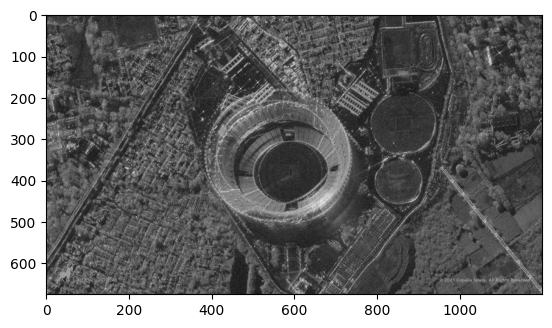

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")

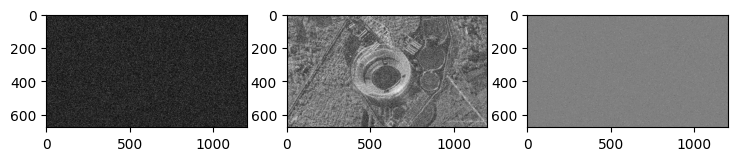

In [5]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

bg_image = np.ones(image_gray.shape, np.uint8) * 128

bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255


image_noise_gauss = cv2.add(image_gray,noise_gauss)

plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(noise_gauss, cmap="gray")

plt.subplot(1, 5, 2)
plt.imshow(image_noise_gauss, cmap="gray")

plt.subplot(1, 5, 3)
plt.imshow(bg_image, cmap="gray")

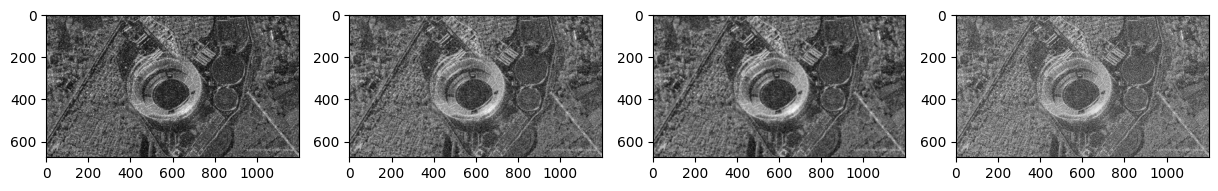

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
plt.imshow(image_gauss_median, cmap="gray")

plt.subplot(1, 4, 2)
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
plt.imshow(image_gauss_gauss, cmap="gray")

plt.subplot(1, 4, 3)
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)
plt.imshow(image_gauss_bilat, cmap="gray")

plt.subplot(1, 4, 4)
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(image_gauss_nlm, cmap="gray")

In [9]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)
print(mse_gauss_median, ssim_gauss_median)

mse_gauss_gauss = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss_gauss, diff) = structural_similarity(image_gray,  image_gauss_gauss, full=True)
print(mse_gauss_gauss, ssim_gauss_gauss)

mse_gauss_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_gauss_bilat, diff) = structural_similarity(image_gray,  image_gauss_bilat, full=True)
print(mse_gauss_bilat, ssim_gauss_bilat)

mse_gauss_nlm = mean_squared_error(image_gray, image_gauss_nlm)
(ssim_gauss_nlm, diff) = structural_similarity(image_gray,  image_gauss_nlm, full=True)
print(mse_gauss_nlm, ssim_gauss_nlm)

1030.7041543209878 0.4318046547248604
1759.2148098765433 0.4887966318634737
1835.0827 0.31541944925189663
4219.454183950617 0.1880681148908449
